 <h1 align="center" style="color:#050505"><strong>Netflix Dataset - Exploratory Data Analysis</h1>

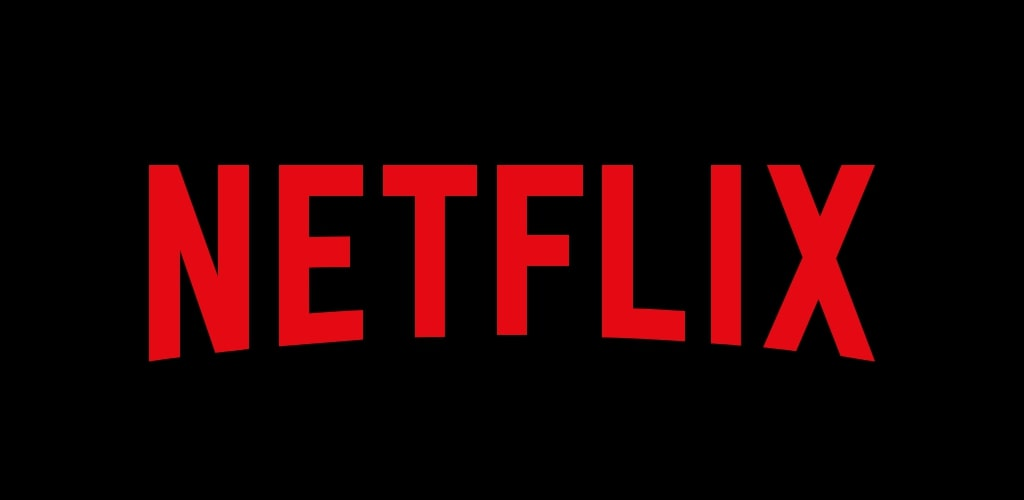

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

### Review & Basic Information About Dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df = pd.DataFrame(dataset)

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
#displays rows and columns respectively
df.shape

(8807, 12)

In [6]:
#stats of object columns
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
#displays if there is duplicates
df.duplicated().sum()

0

### Dataset Cleaning

In [9]:
#unique values in country column
df['country'].isna().sum()

831

In [10]:
df['country'] = df['country'].astype(str)
df['country'] = df['country'].apply(lambda x : x.split(', ')[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [11]:
df['country'].value_counts()

country
United States     3210
India             1008
nan                831
United Kingdom     626
Canada             271
                  ... 
Namibia              1
Senegal              1
Cameroon             1
Syria                1
Somalia              1
Name: count, Length: 90, dtype: int64

In [12]:
#cleaning cast and director columns
df['director'].isnull().sum()

2634

In [13]:
df['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [14]:
# % of null values
percent_null = df.isnull().sum() * 100 / df.shape[0]
percent_null.round(2).sort_values(ascending = False)

director        29.91
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
country          0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

In [15]:
#filling null values in columns
# with new category
df['cast'].fillna('Unknown', inplace = True)
df['director'].fillna('Unknown', inplace = True)

In [16]:
#with mode
mode = ['date_added', 'rating', 'duration']
for i in mode:
    df[i] = df[i].fillna(df[i].mode()[0])

In [17]:
df['year'] = df['date_added'].apply(lambda x : x.split(', ')[-1])
df['month'] = df['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

In [18]:
#dropping columns that are not needed
df.drop(['show_id','date_added','description'],axis=1, inplace=True)
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
year            0
month           0
dtype: int64

In [19]:
#cleaning rating column
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [20]:
df['rating'] = df['rating'].replace({'74 min' : np.nan, '84 min' : np.nan, '66 min': np.nan
                                    , 'TV-Y7-FV' : 'TV-Y7'})
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'UR'], dtype=object)

In [21]:
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,year,month
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,2021,September
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",nan,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,nan,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,September
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,September


### Visualizations

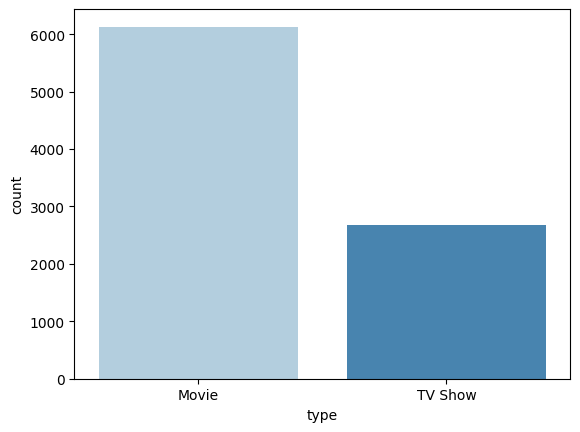

In [22]:
sns.countplot(x ='type', data = df, palette="Blues")
plt.show()

Based on the countplot, the quantity of moives is roughly double that of TV shows.

### Month with the fewest releases

In [23]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
df1 = df.groupby('year')['month'].value_counts().unstack()[month]

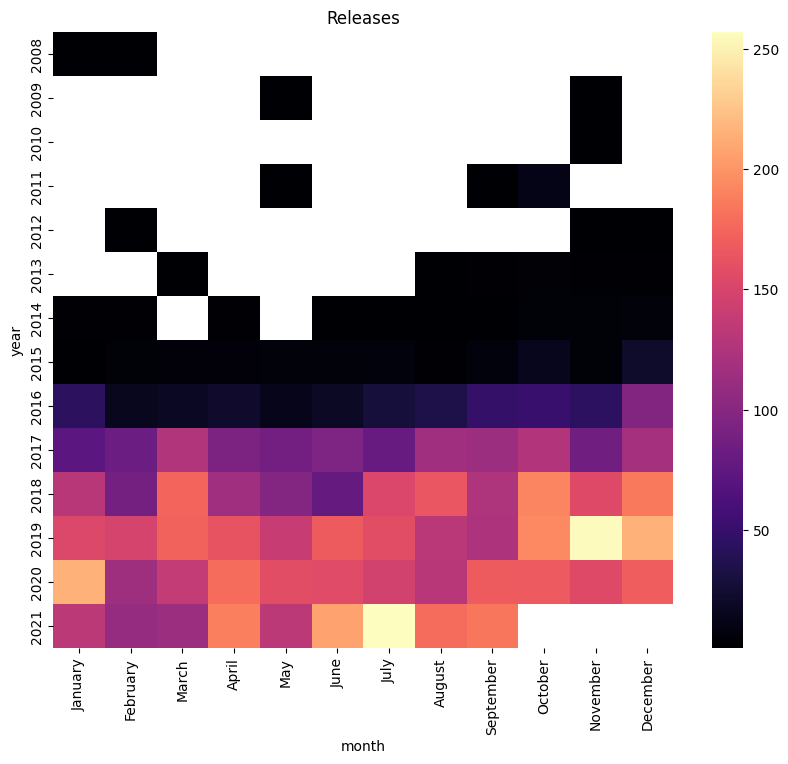

In [24]:
fig,ax = plt.subplots(1,1,figsize = (10,8))
ax = sns.heatmap(df1,cmap="magma")
plt.title('Releases')
plt.show()

So, according to the data from the most recent complete year, 2020, the most favorable months for adding new content are February, March, and May.

### What is the most common genre in the dataset of movies and TV shows?

In [25]:
#creating a dataframe for movies
movie = (df['type'] == 'Movie')
movie_df = df[movie]
movie_df.head()


,type,title,director,cast,country,release_year,rating,duration,listed_in,year,month
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,2021,September
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",nan,2021,PG,91 min,Children & Family Movies,2021,September
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas",2021,September
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",Germany,2021,TV-MA,127 min,"Dramas, International Movies",2021,September


In [26]:
#creating a dataframe for tv show
tv_show = (df['type'] == 'TV Show')
tvdf = df[tv_show]
tvdf.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,year,month
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",nan,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,nan,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,September
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,September
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",nan,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,September


In [27]:
#movie genres
genres = {}
for genre in movie_df['listed_in']:
    for i in genre.split(','):
        i=i.strip()
        if i not in genres:
            genres[i] = 1
        else:
            genres[i] += 1
        
genre_movie_df = pd.DataFrame(list(genres.items()), columns= ['Genre', 'Number of Movies'])
genre_movie_df['Genre'].unique()

array(['Documentaries', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'Comedies',
       'Thrillers', 'Romantic Movies', 'Music & Musicals',
       'Horror Movies', 'Sci-Fi & Fantasy', 'Action & Adventure',
       'Classic Movies', 'Anime Features', 'Sports Movies', 'Cult Movies',
       'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy',
       'Movies'], dtype=object)

In [28]:
genre_movie_df.sort_values(by = 'Number of Movies', ascending = False).head()

,Genre,Number of Movies
4,International Movies,2752
2,Dramas,2427
5,Comedies,1674
0,Documentaries,869
11,Action & Adventure,859


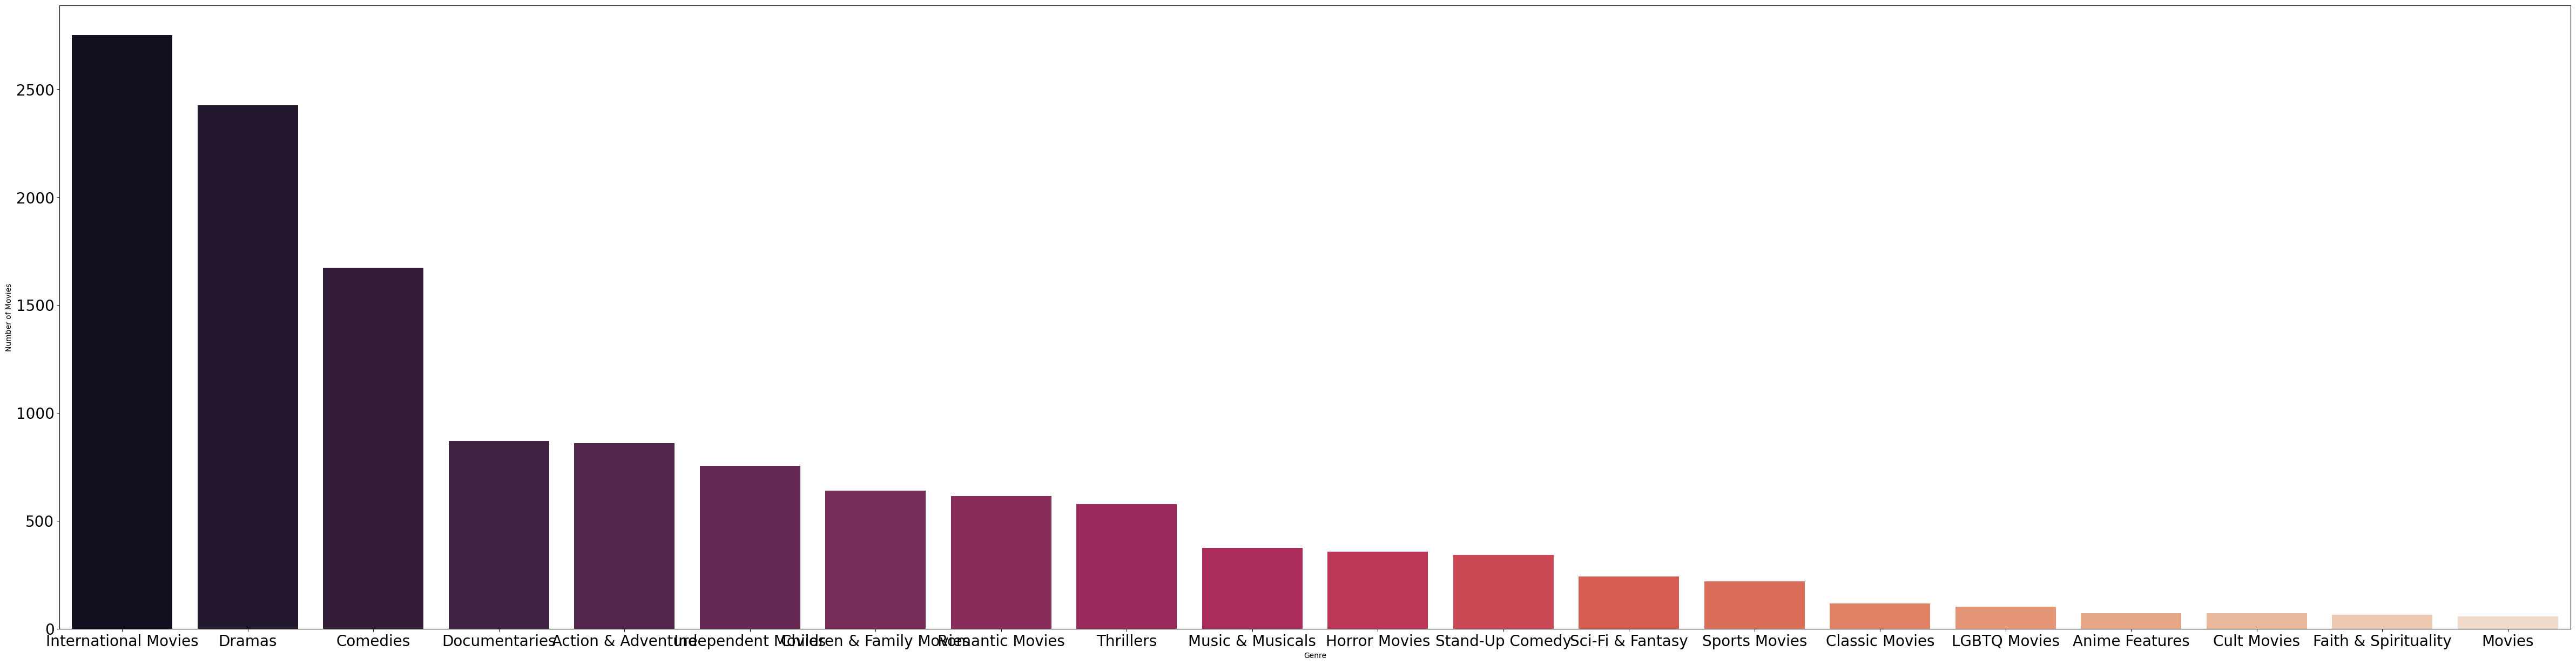

In [29]:
fig, ax = plt.subplots(figsize=(60, 15))
sns.barplot(x='Genre', y='Number of Movies',
            data=genre_movie_df.sort_values(by = 'Number of Movies', ascending = False), palette='rocket')
plt.tick_params(labelsize=20)
plt.show()

As observed, the predominant genre among movies is International Movies.

In [30]:
#tvshow genre
genrestwo = {}
for genretwo in tvdf['listed_in']:
    for i in genretwo.split(','):
        if i not in genrestwo:
            genrestwo[i] =1
        else:
            genrestwo[i] += 1
    

            
genre_tv_df = pd.DataFrame(list(genrestwo.items()), columns= ['Genre', 'Number of TV show'])
genre_tv_df.head(3)

,Genre,Number of TV show
0,International TV Shows,774
1,TV Dramas,696
2,TV Mysteries,98


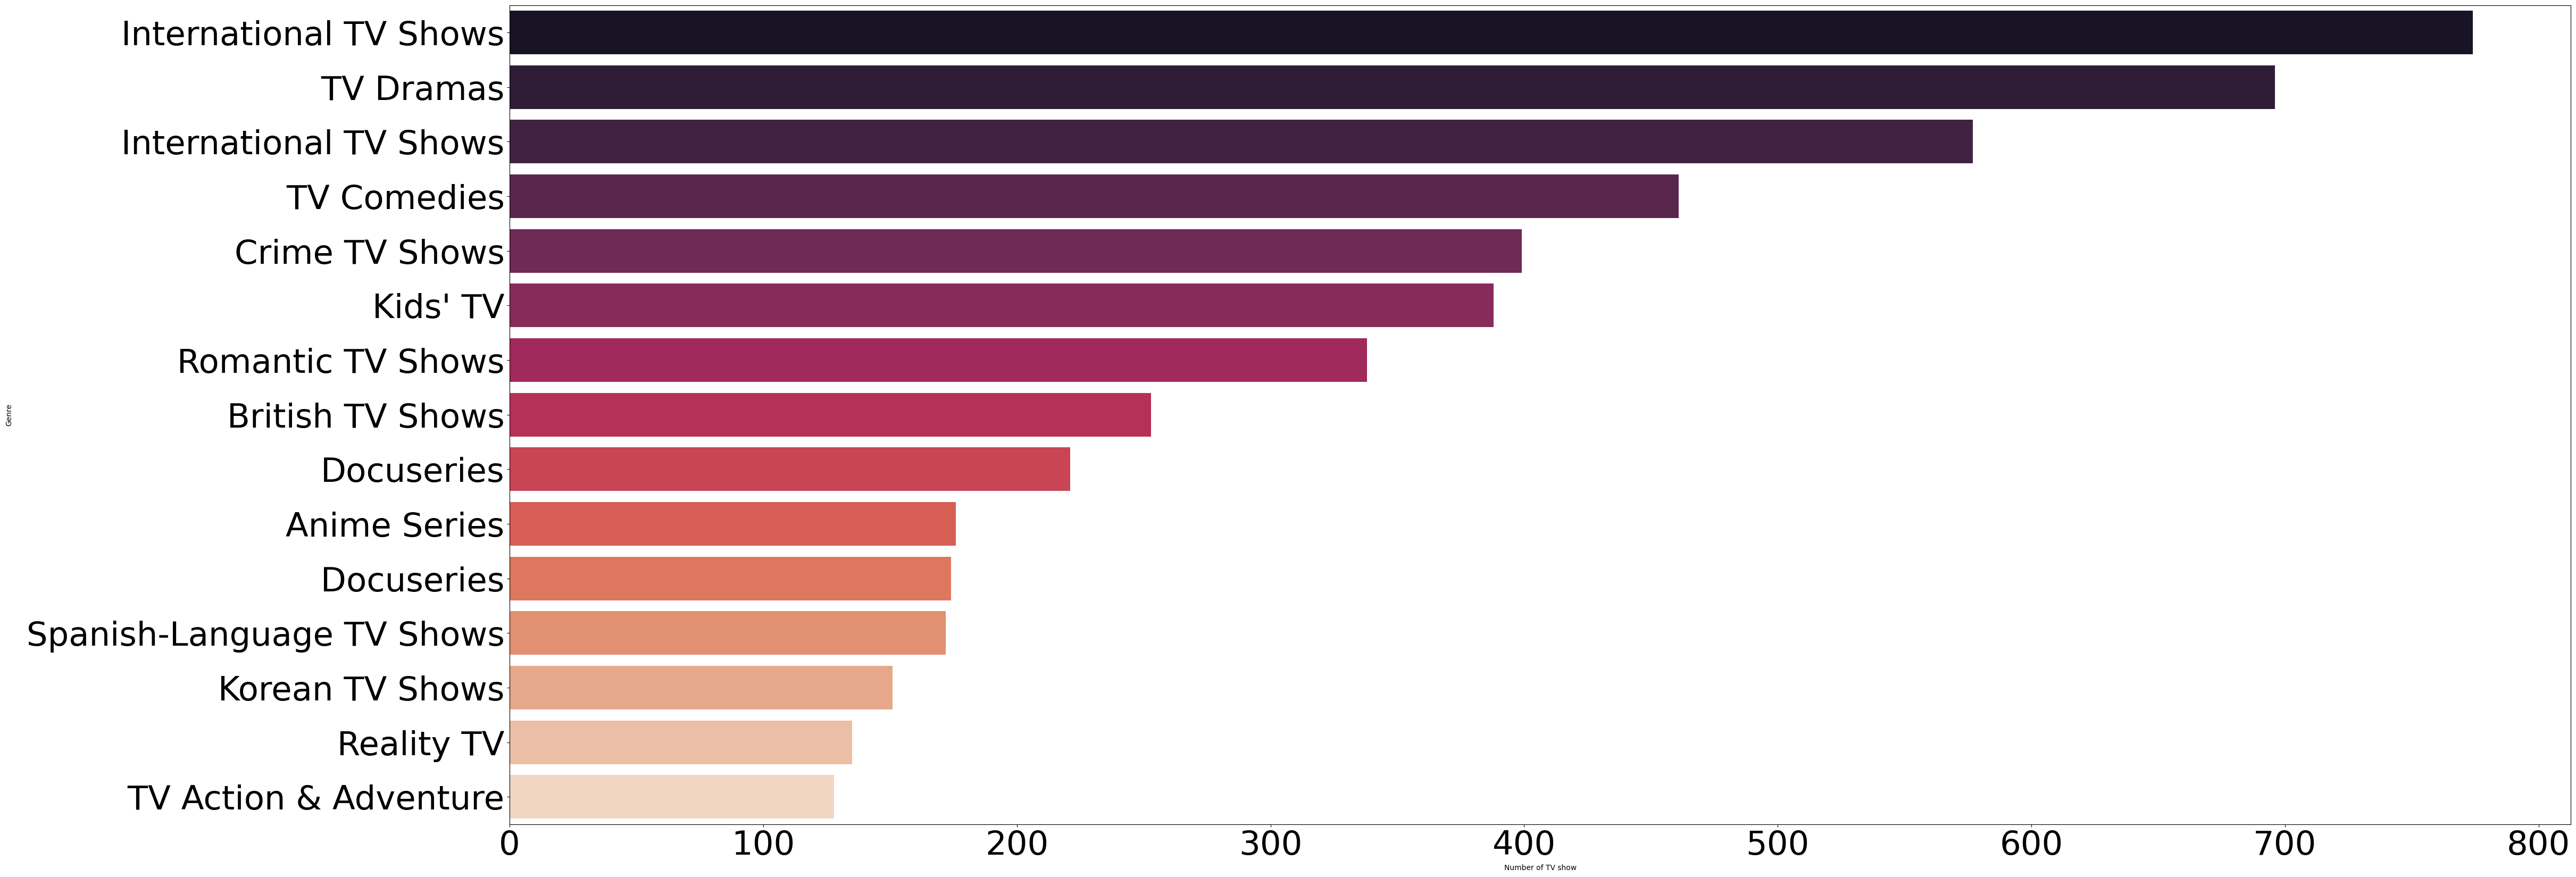

In [31]:
fig, ax = plt.subplots(figsize=(50, 20))
sns.barplot(y='Genre', x='Number of TV show',
            data=genre_tv_df.sort_values(by = 'Number of TV show', ascending = False).loc[0:5],
            palette='rocket')

plt.tick_params(labelsize=45)
plt.show()

As evident, the primary genre among TV shows is International TV Shows.

### Which year saw the highest number of movie/TV show releases?

In [32]:
pp = df.groupby('release_year')['type'].value_counts().unstack(level=-1)

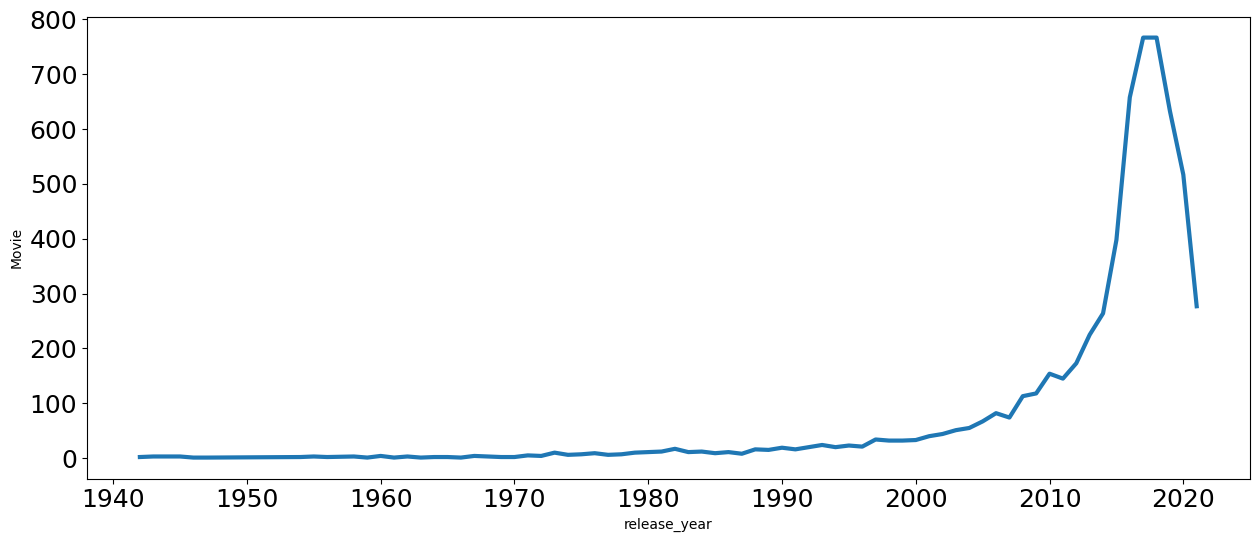

In [33]:
fig, av = plt.subplots(1,1, figsize = (15,6))
ax = sns.lineplot(x='release_year', y='Movie', data=pp, linewidth=3)
plt.tick_params(labelsize=18)

plt.show()

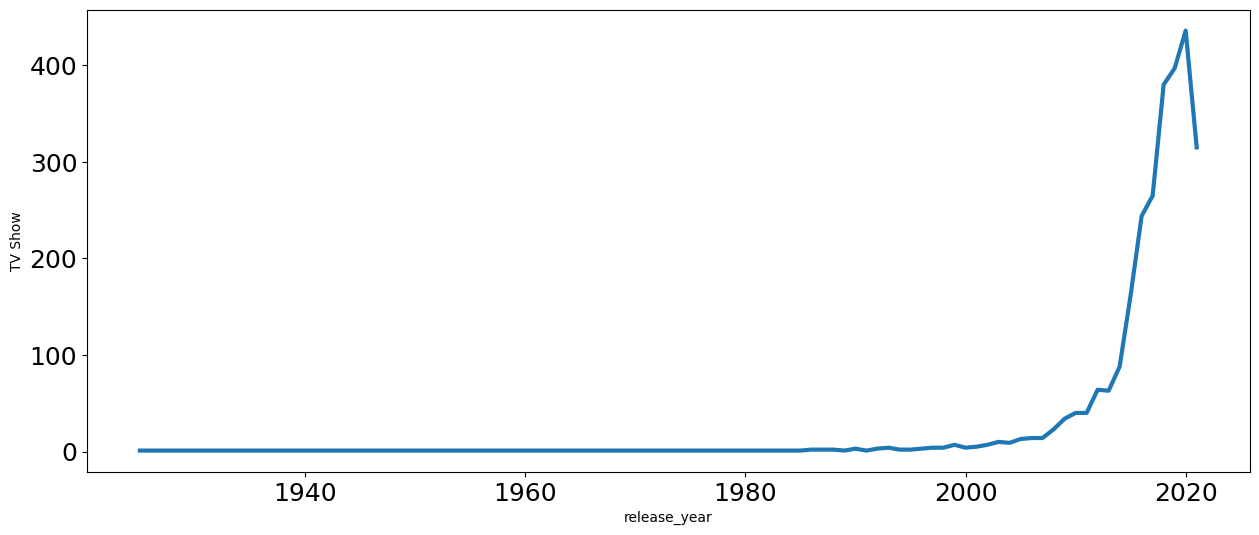

In [34]:
fig, av = plt.subplots(1,1, figsize = (15,6))
ax = sns.lineplot(x='release_year', y='TV Show', data=pp, linewidth=3)
plt.tick_params(labelsize=18)

plt.show()

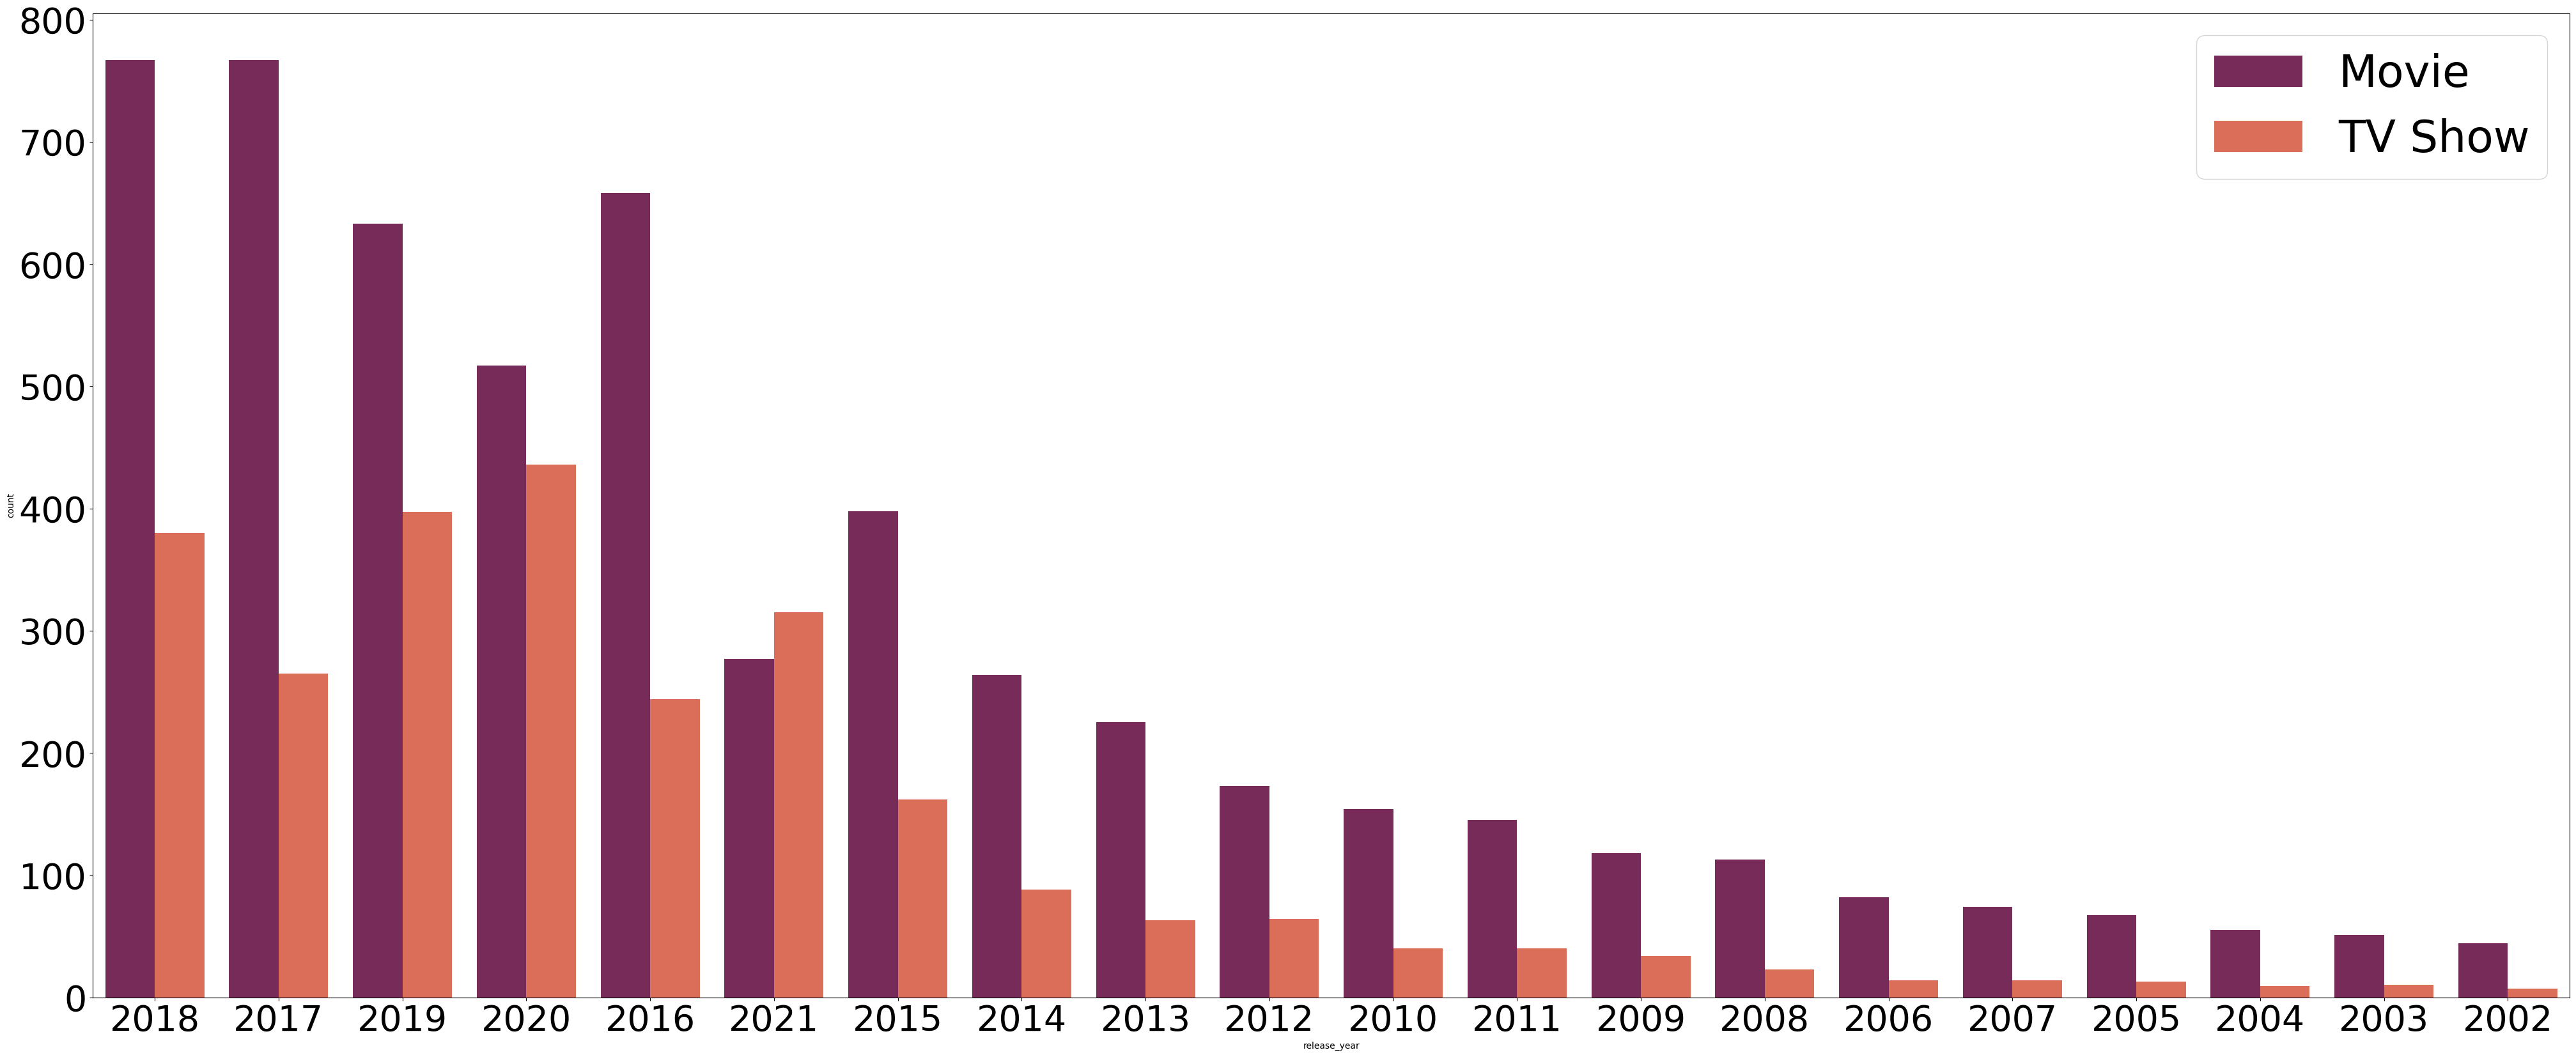

In [35]:
ig, ax = plt.subplots(figsize=(50, 20))
y = sns.countplot(x='release_year', 
            data=df, palette='rocket', hue='type', order=df['release_year'].value_counts().index[0:20])

plt.tick_params(labelsize=40)
y.legend(fontsize=50)
plt.show()

 * **TV Shows** - 2018
* **Movies** - 2020

### Which country has the highest number of releases?

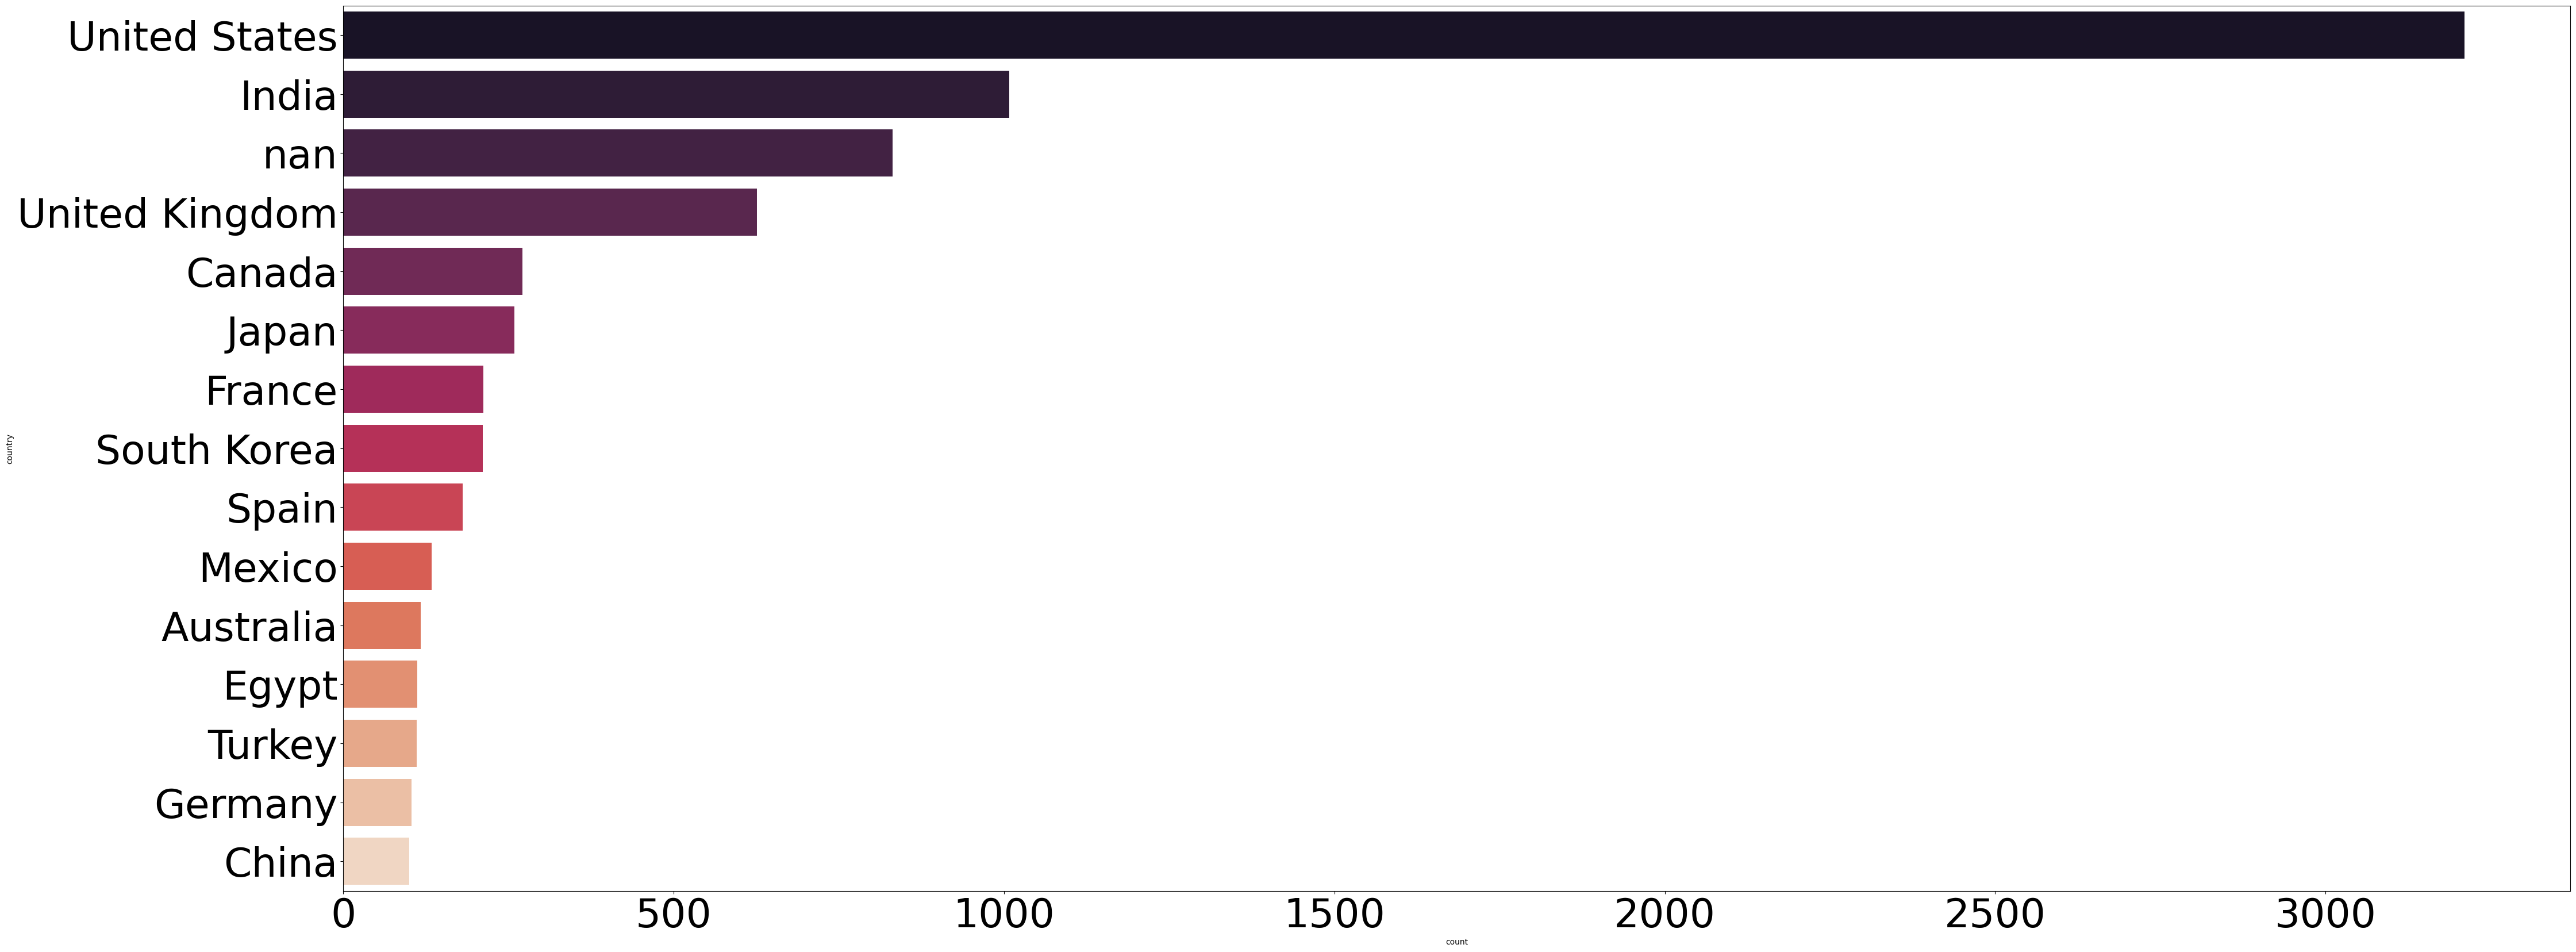

In [36]:
ig, ax = plt.subplots(figsize=(50, 20))
y = sns.countplot(y='country', 
            data=df, palette='rocket', order=df['country'].value_counts().index[:15])

plt.tick_params(labelsize=50)
plt.show()

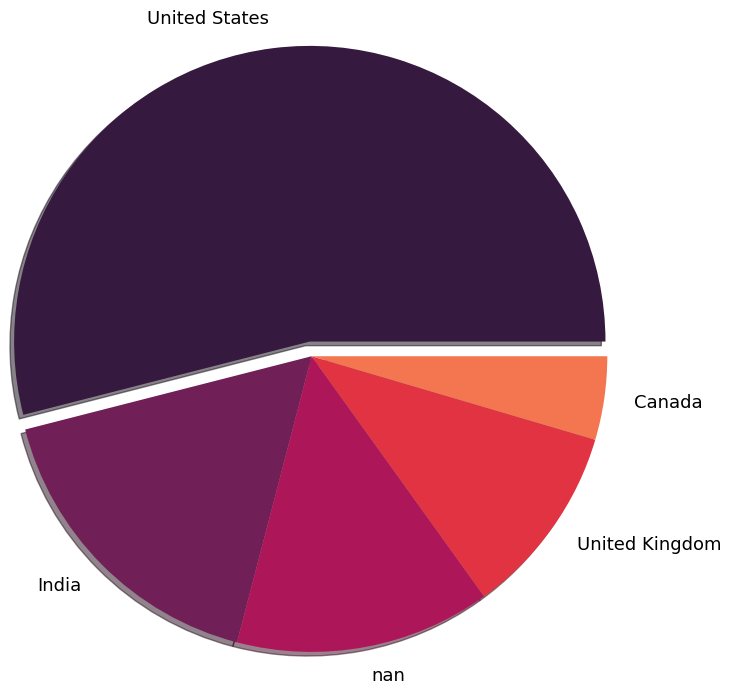

In [37]:
sizes = df['country'].value_counts()
z = np.zeros(748)
z[0] = 0.1

labels = []
for i in df['country'].value_counts()[:5].index:
    labels.append(i)
    
fig, ax = plt.subplots()
explode = (0.1, 0, 0, 0)
ax.pie(sizes[:5],explode=z[:5],labels = labels, radius = 2, shadow = True,
      textprops = {'fontsize':13}, colors=sns.color_palette('rocket'))

plt.show()

The United States has released the highest number of movies and TV shows.

### What is the duration range for movies and TV shows?

* Before processing the duration column in the movies dataframe, it's necessary to perform cleaning tasks on it.

In [38]:
movie_df['duration'] = movie_df['duration'].str.replace("min", " ").str.replace("Season"," ").str.strip()
movie_df['duration'] = movie_df['duration'].astype('int32')

In [39]:
runtime_min = movie_df[movie_df['duration'] > 1]

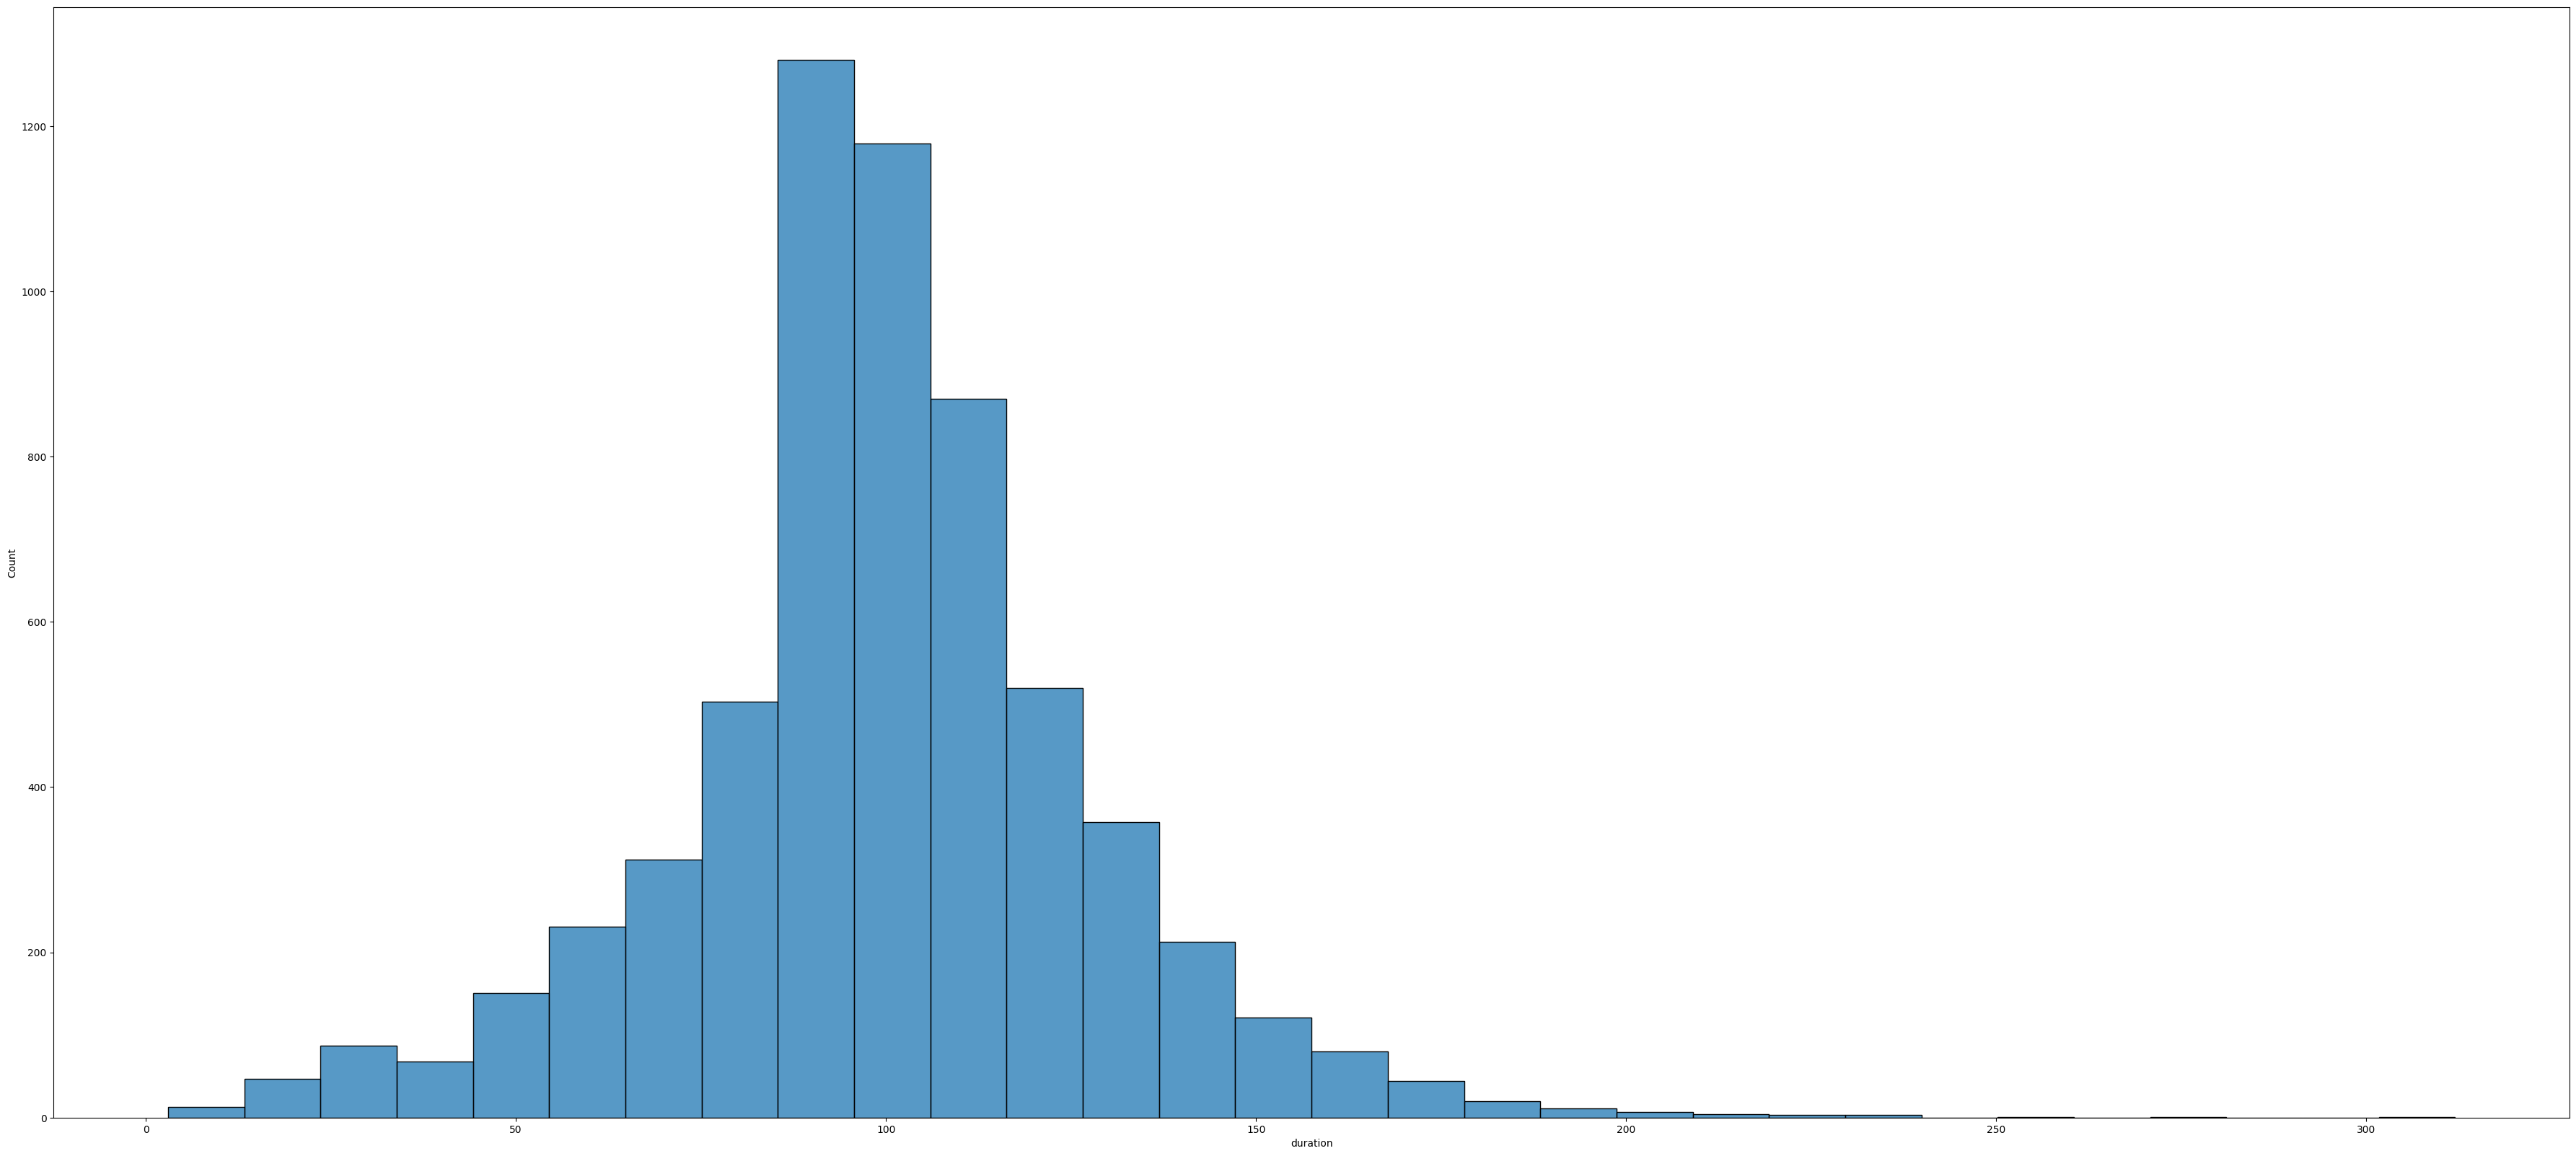

In [40]:
plt.figure(figsize=(45,20))
ax = sns.histplot(x=runtime_min['duration'], data=runtime_min, bins=30,
                  palette = 'rocket')

plt.show()

As observed, the duration range for movies falls between 90 and 100 minutes.

### How many season/s do majority of TV shows have ?

In [41]:
#cleaning duration column for tv shows
tvdf['duration'] = tvdf['duration'].str.replace("Seasons", " ").str.replace("Season", " ").str.strip()
tvdf['duration'] = tvdf['duration'].astype('int32')

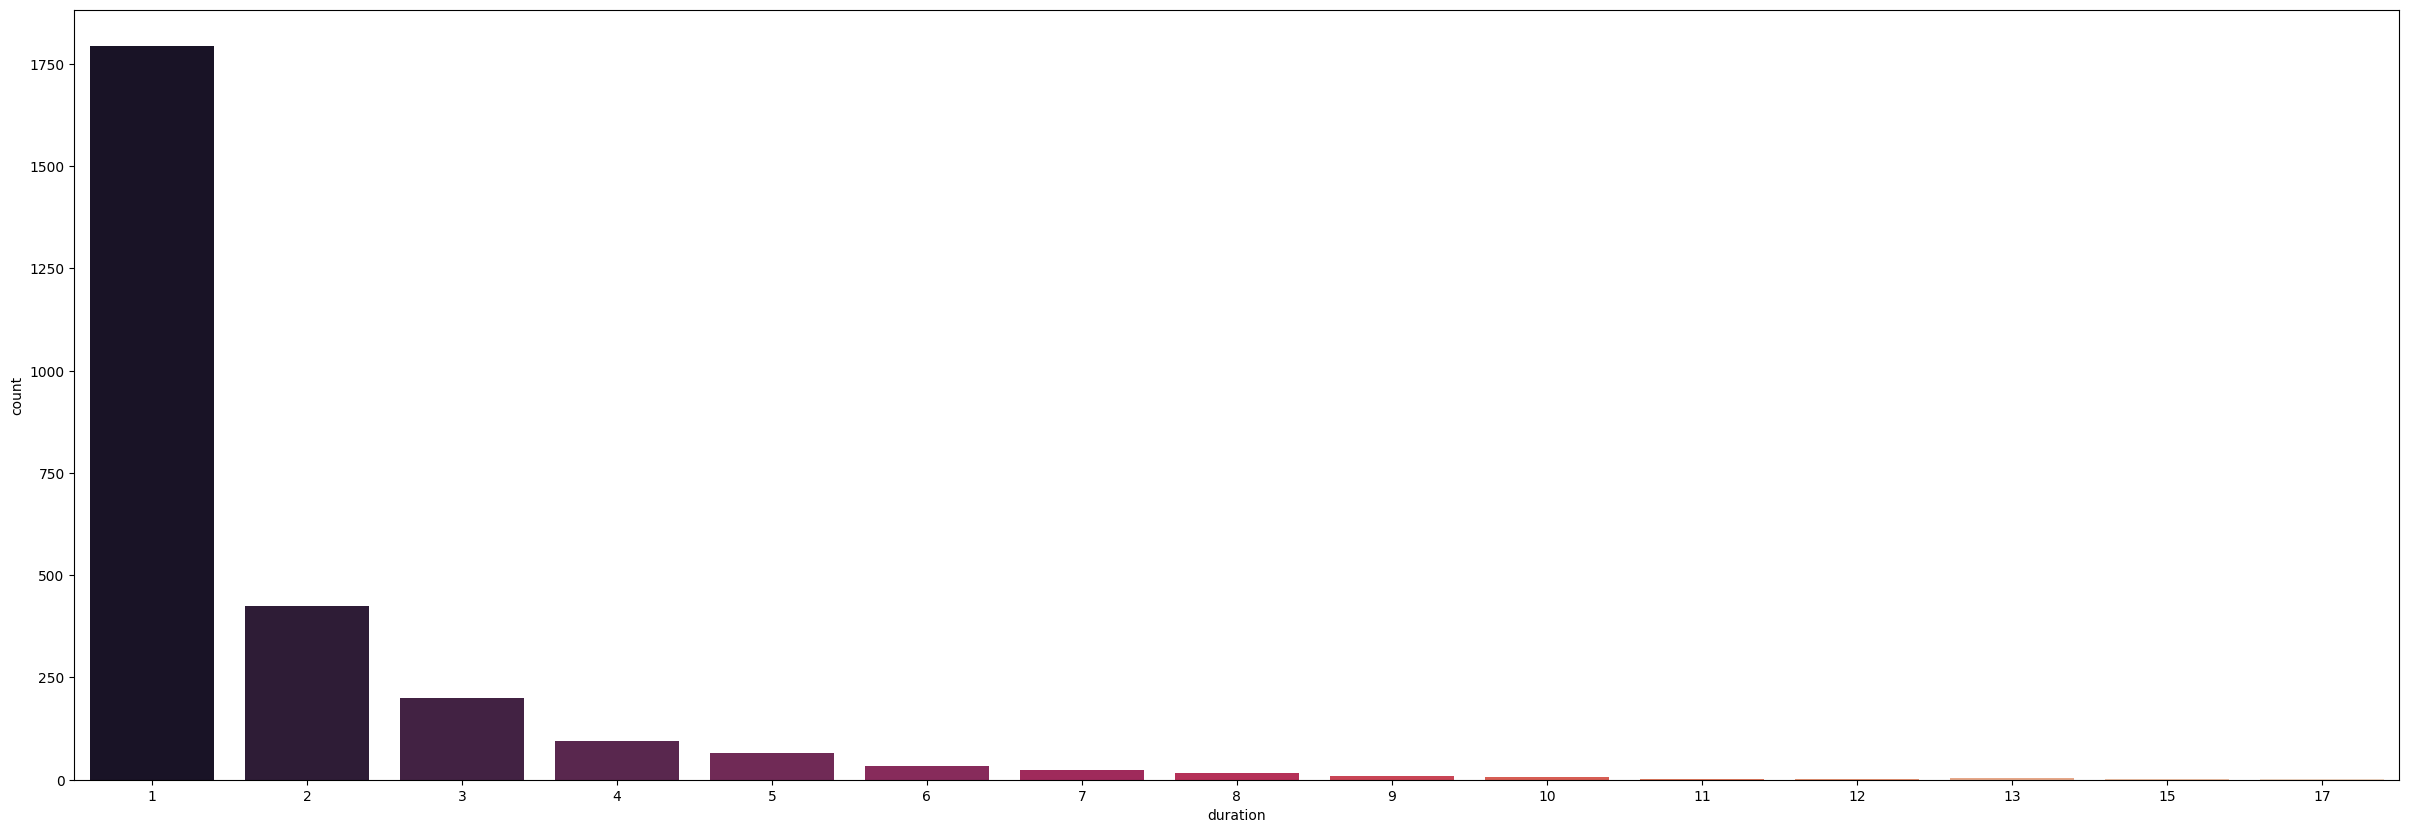

In [42]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x=tvdf['duration'], data=tvdf,
                   palette='rocket')
plt.show()

The majority of TV shows consist of just one season.

### What is the most commonly occurring rating among movies and TV shows?

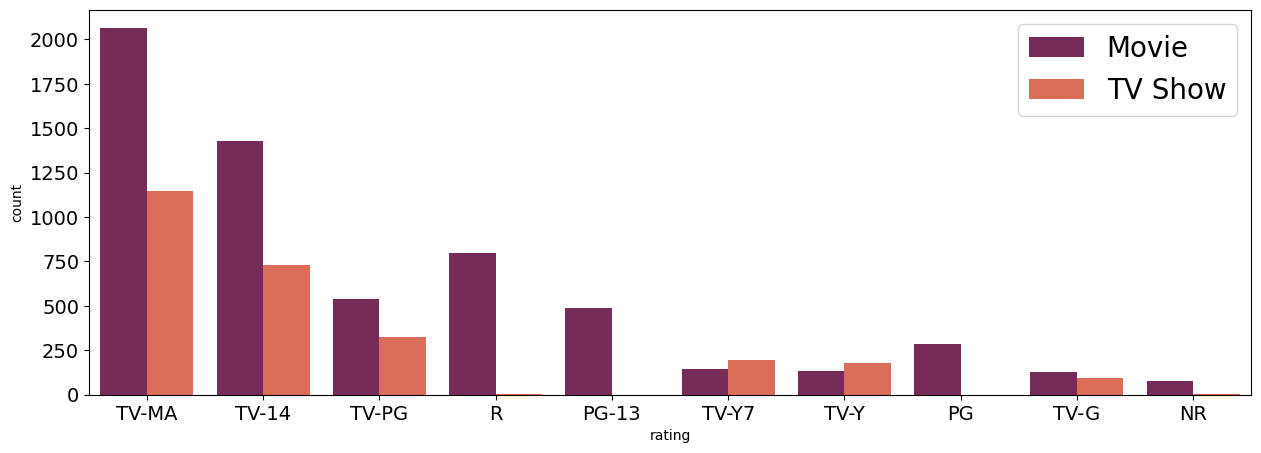

In [43]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.tick_params(labelsize=14)
ax = sns.countplot(x='rating', data=df, palette='rocket', hue='type', 
                   order=df['rating'].value_counts().index[0:10])

plt.legend(fontsize=20)

plt.show()

TV-MA or Adults is the most prevalent rating among movies and TV shows.

### Which TV show boasts the highest number of seasons?

In [44]:
tvdf[['duration','title']].sort_values(by='duration', ascending =False).head()

,duration,title
548,17,Grey's Anatomy
2423,15,Supernatural
4798,15,NCIS
1354,13,Heartland
4220,13,COMEDIANS of the world


The TV show with the highest number of seasons is Grey's Anatomy.